In [1]:
import pandas as pd
df = pd.read_csv("BECHDEL___masterList.csv", dtype={'budget': float, 'revenue': float, 
                                                    'vote_count': float, 'Bechdel_Test': float})
df.head(3)

,winner,movie_title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Bechdel_Test
0,1.0,lawrence of arabia,"[{""cast_id"": 18, ""character"": ""T.E. Lawrence"",...","[{""credit_id"": ""5715157dc3a3684122010c0c"", ""de...",15000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 487, ""name"": ""cairo""}, {""id"": 1975, ""n...",en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,...,1962-12-10,69995385.0,216.0,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,NaN,Lawrence of Arabia,7.8,851.0,1.0
1,1.0,the longest day,"[{""cast_id"": 20, ""character"": ""Col. Thompson"",...","[{""credit_id"": ""53ba7918c3a3685eb1006f7a"", ""de...",10000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",en,The Longest Day,"The retelling of June 6, 1944, from the perspe...",...,1962-09-25,50100000.0,178.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,This is the day that changed the world... When...,The Longest Day,7.2,234.0,0.0
2,1.0,to kill a mockingbird,"[{""cast_id"": 8, ""character"": ""Atticus Finch"", ...","[{""credit_id"": ""52fe4259c3a36847f8017773"", ""de...",2000000.0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 577, ""name"": ""black people""}, {""id"": 8...",en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",...,1962-12-25,13129846.0,129.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,To Kill a Mockingbird,8.0,657.0,1.0


In [2]:
df.tail(3)

,winner,movie_title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Bechdel_Test
4792,0.0,signed sealed delivered,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",...,2013-10-13,0.0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6.0,0.0
4793,0.0,shanghai calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",0.0,[],[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,...,2012-05-03,0.0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7.0,0.0
4794,0.0,my date with drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de...",0.0,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,...,2005-08-05,0.0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16.0,0.0


In [3]:
###### Pre-OneHot Encoding Plots ######
#######################################
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Bar Graph compares films passing the Bechdel Test vs. films failing.
sns.countplot(x='Bechdel_Test', data = df)

print("Count of Failed Bechdel Tests Films: ", len(df.loc[df['Bechdel_Test'] == 0]))
print("\nCount of Passed Bechdel Tests Films: ", len(df.loc[df['Bechdel_Test'] == 1]))

Count of Failed Bechdel Tests Films:  2806

Count of Passed Bechdel Tests Films:  1989


The strongest correlating attribute of Winning = Revenue

There also appear to be other moderate (+70%) correlations of: 
---Budget/Revenue, 
---Popularity/Vote_Count, 
---Revenue/Vote_Count


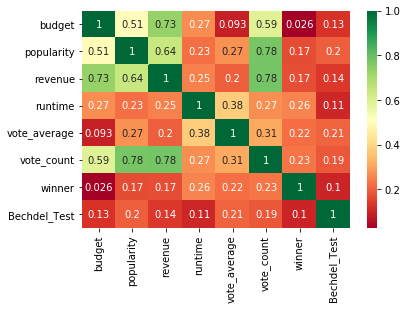

In [4]:
# Heatmap Correlation Analysis
g = sns.heatmap(df[['budget','popularity','revenue','runtime','vote_average','vote_count', 'winner', 'Bechdel_Test']].corr(),cmap='RdYlGn',annot=True)

print("The strongest correlating attribute of Winning = Revenue\n\nThere also appear to be other moderate (+70%) correlations of: \n---Budget/Revenue, \n---Popularity/Vote_Count, \n---Revenue/Vote_Count")

There is small ~10% correlation to Winning/Passed-Bechdel


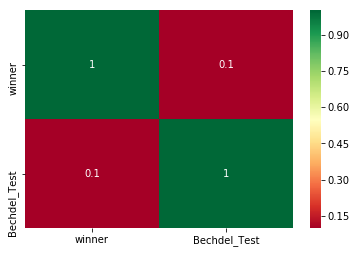

In [5]:
g = sns.heatmap(df[['winner', 'Bechdel_Test']].corr(),cmap='RdYlGn',annot=True)

print("There is small ~10% correlation to Winning/Passed-Bechdel")

X Axis:

---0.0 = Failed Bechdel Test
---1.0 = Passed Bechdel Test


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


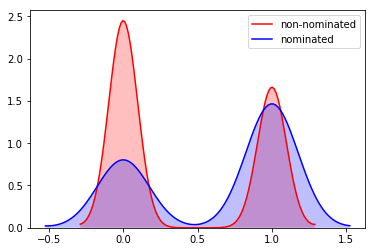

In [6]:
# Density Curve: Bechel Test
bTest0 = df[df['winner'] == 0]['Bechdel_Test']
bTest1 = df[df['winner'] == 1]['Bechdel_Test']

g = sns.kdeplot(bTest0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(bTest1, legend = True, shade=True, color='b', label = 'nominated')

print("X Axis:\n\n---0.0 = Failed Bechdel Test\n---1.0 = Passed Bechdel Test")
#todo:::   change the x ticks to represent that

In [7]:
import json
import numpy as np

genres_name0 = {}
genres_name1 = {}
genres_set = set()

# Fancy Itterrows() looks for Bechdel_Test result bool, if a dictionary with the name of the
# current movie doesn't exist in the genres_name0/1 then one is appended with a tally count
# of 1. If a dict already exists then the tally count is increased by 1.
for i in range(len(df)):
    genres = json.loads(df.loc[i,'genres'])
    for it in genres:
        genres_set.add(it['name'])
        if df.loc[i,'Bechdel_Test'] == 0:
            if it['name'] not in genres_name0:
                genres_name0[it['name']] = 1
            else:
                genres_name0[it['name']] += 1
        if df.loc[i,'Bechdel_Test'] == 1:
            if it['name'] not in genres_name1:
                genres_name1[it['name']] = 1
            else:
                genres_name1[it['name']] += 1
            
genres_array0=[]
genres_array1=[]

# Binning of Genre names
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)

# NumPy % of whole calculations for upcoming plot
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

# New DF creation to hold the by-Genre data
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

     Horror     Drama       War  Science Fiction   Romance     Music  \
0  0.042623  0.189868  0.013347         0.038031  0.074627  0.015643   
1  0.042890  0.187210  0.009853         0.051971  0.072063  0.014683   

   Thriller     Crime  Documentary    Action  Western   Foreign   History  \
0  0.102038  0.055396     0.014351  0.093427  0.00775  0.003875  0.017796   
1  0.108385  0.059892     0.001739  0.096986  0.00541  0.001352  0.014104   

    Mystery    Comedy    Family  Adventure   Fantasy  Animation  TV Movie  
0  0.025689  0.143513  0.044202   0.065442  0.032721   0.018944  0.000718  
1  0.032651  0.138717  0.039413   0.064529  0.037867   0.019706  0.000580  


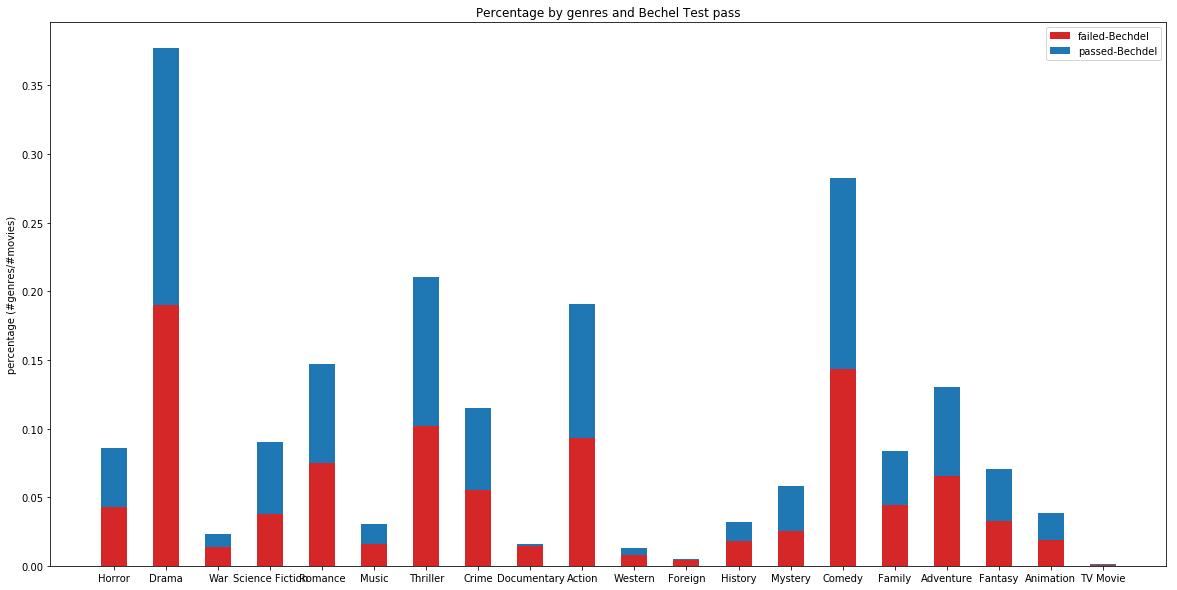

In [8]:
# Stacked Bars: Bechdel Test % / Movie Genres
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.5

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])

plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and Bechel Test pass')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('failed-Bechdel','passed-Bechdel'))

In [9]:
###### One-Hot Encoding --- ML Preperation ######
#################################################

# Since many columns such as “crew”, “cast” contain information in json format, we need to 
# extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into 
# our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]

def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to 
        conduct feature engineering on 
        
        df: dataframe that perform feature engineering on
        
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}

    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] not in name:
                name[it[json_name]] = 1
            else:
                name[it[json_name]] += 1
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] in final:
                index = final[it[json_name]]
                np_item[row][index] = 1
        row += 1

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [10]:
# DF2 expands all the json data of cast and makes new columns for each one before deleting
# the original cast column.
df2 = feature_engineering("cast", df, "name")
df2 = df2.drop('cast', axis = 1)
df2.head(3)

,winner,movie_title,crew,budget,genres,keywords,original_language,original_title,overview,popularity,...,Will Oldham,Jace Casey,Maryette Charlton,Pamela Shaw,King Donovan,Richard Carroll Jr.,Elissa Dowling,David Call,Andrew Bujalski,Ricardo Garcia
0,1.0,lawrence of arabia,"[{""credit_id"": ""5715157dc3a3684122010c0c"", ""de...",15000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 487, ""name"": ""cairo""}, {""id"": 1975, ""n...",en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,41.286336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,the longest day,"[{""credit_id"": ""53ba7918c3a3685eb1006f7a"", ""de...",10000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...","[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",en,The Longest Day,"The retelling of June 6, 1944, from the perspe...",19.524972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,to kill a mockingbird,"[{""credit_id"": ""52fe4259c3a36847f8017773"", ""de...",2000000.0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 577, ""name"": ""black people""}, {""id"": 8...",en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",22.139842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# DF3 expands all the json data of crew and makes new columns for each one before deleting
# the original crew column.
crew_name = {}

# Director
for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] not in crew_name:
                crew_name[it['name']] = 1
            else:
                crew_name[it['name']]+=1


# Set the appear tims for Actors
final_crew = {}
index = 0
for k,v in crew_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['crew']:
    crew = json.loads(item)
    for it in crew:
        if it['job'] == 'Director':
            if it['name'] in final_crew:
                index = final_crew[it['name']]
                np_crew[row][index] = 1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
print(df.shape)
#df3.head(3)

(4795, 23)


In [12]:
# Doing the same concept but for a multitude of json filled column entries across the entire
# DataFrame. Each evolution is morphed into the next until we get to DF8 in this part.
df3=df3.drop(['crew'],axis=1)
#genres
df4 = feature_engineering("genres", df3, "name")
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
df8 = df8.drop(['spoken_languages'],axis=1)

# movieName, filmInfo, and award columns do not exist -- possible artifacts from team?

df8.head(3)

,winner,movie_title,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,bs,hr,sk,kk,ml,cy,ps,mn,xx,id
0,1.0,lawrence of arabia,15000000.0,en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,41.286336,1962-12-10,69995385.0,216.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,the longest day,10000000.0,en,The Longest Day,"The retelling of June 6, 1944, from the perspe...",19.524972,1962-09-25,50100000.0,178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,to kill a mockingbird,2000000.0,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",22.139842,1962-12-25,13129846.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# DF_CLEAN is created from DF8 sans the below columns. It will then be encoded into OneHot,
# and then hopefully fit into training sets to create models.
df_clean = df8.drop(["movie_title", "original_title", "overview", "tagline", "title", "original_language",
                    "status", "release_date"], axis=1)

print(df_clean.shape)
df_clean.head(3)

(4795, 24479)


,winner,budget,popularity,revenue,runtime,vote_average,vote_count,Bechdel_Test,Peter O'Toole,Alec Guinness,...,bs,hr,sk,kk,ml,cy,ps,mn,xx,id
0,1.0,15000000.0,41.286336,69995385.0,216.0,7.8,851.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,10000000.0,19.524972,50100000.0,178.0,7.2,234.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2000000.0,22.139842,13129846.0,129.0,8.0,657.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Debugging for 2 cells below ValueError
# Ended up being easier to just drop the two problem rows containing NaNs
df_clean = df_clean.dropna(axis='index', how='any')

print(f"Number of null values in entire DF: {df_clean.isnull().sum().sum()}\n")

# If non-float types exist they'll be printed
for dtype in df_clean.dtypes:
    if dtype != float:
        print(dtype)

Number of null values in entire DF: 0



In [15]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#?                      Big Brain Stuff Ahead                    ?#
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Model Training --- I replaced winner with Bechdel_Test
X = df_clean[df_clean.columns.difference(['Bechdel_Test'])]
# X = StandardScaler().fit_transform(X)
y = df_clean['winner']

In [16]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.27, train_size=0.73, random_state=9001)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(penalty='elasticnet', multi_class='ovr', n_jobs=-1, l1_ratio=0, random_state=288, solver='saga', max_iter=5000, verbose=10)
logisticRegr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 1974 epochs took 199 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.3min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=5000,
                   multi_class='ovr', n_jobs=-1, penalty='elasticnet',
                   random_state=288, solver='saga', tol=0.0001, verbose=10,
                   warm_start=False)

In [20]:
# Predict for One Observation
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test))
print(y_test.index)

[0. 0. 1. ... 1. 0. 0.]
Int64Index([4041, 4223, 4011, 2347,  379, 1398, 3965,  617, 3497, 1048,
            ...
            1879, 4146,  195, 3067, 3981, 2167, 1645, 4408, 2355, 2229],
           dtype='int64', length=1295)


In [21]:
logisticRegr.score(X_train, y_train)

1.0

In [22]:
logisticRegr.score(X_test, y_test)

0.8988416988416988

In [23]:
from sklearn.metrics import confusion_matrix
import math
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()

print(f"Total - Y_Test: {len(y_test)}")
print(f"Total - Predicted: {len(predicted)}\n")

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}\n")

sensitivity = tp/(tp+fn)
print(f"Sensetivity / True Positive Rate: {sensitivity}\n")

specificity = tn/(tn+fp)
print(f"Specificity / True Negative Rate: {specificity}\n")

precision = tp/(tp+fp)
print(f"Precision / Positive Predictive Value: {precision}\n")

npv = tn/(tn+fn)
print(f"Negative Predictive Value: {npv}\n")

miss_rate = fn/(fn+tp)
print(f"Miss Rate / False Negative Rate: {miss_rate}\n")

fall_out = fp/(fp+tn)
print(f"Fall-Out / False Positive Rate: {fall_out}\n")

fdr = fp/(fp+tp)
print(f"False Discovery Rate: {fdr}\n")

fOMr = fn/(fn+tn)
print(f"False Omission Rate: {fOMr}\n")

threat_score = tp/(tp+fn+fp)
print(f"Threat Score / Critical Success Index: {threat_score}\n")

accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Accuracy: {accuracy}\n")

f1_score = (2*tp)/((2*tp)+fp+fn)
print(f"F1 Score / Harmonic Mean of Precision(PPV) and Sensetivity(TPR): {f1_score}\n")

mcc = ((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(f"Matthews Correlation Coefficient: {mcc}\n")

informedness = (sensitivity+specificity-1)
print(f"Informedness / Bookmaker Informedness: {informedness}\n")

markedness = (precision+npv-1)
print(f"Markedness: {markedness}\n")

Total - Y_Test: 1295
Total - Predicted: 1295

True Negatives: 1126
False Positives: 113
False Negatives: 18
True Positives: 38

Sensetivity / True Positive Rate: 0.6785714285714286

Specificity / True Negative Rate: 0.9087974172719936

Precision / Positive Predictive Value: 0.25165562913907286

Negative Predictive Value: 0.9842657342657343

Miss Rate / False Negative Rate: 0.32142857142857145

Fall-Out / False Positive Rate: 0.09120258272800645

False Discovery Rate: 0.7483443708609272

False Omission Rate: 0.015734265734265736

Threat Score / Critical Success Index: 0.22485207100591717

Accuracy: 0.8988416988416988

F1 Score / Harmonic Mean of Precision(PPV) and Sensetivity(TPR): 0.3671497584541063

Matthews Correlation Coefficient: 0.37225375610312933

Informedness / Bookmaker Informedness: 0.5873688458434221

Markedness: 0.23592136340480718



In [24]:
# 3-fold Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)
sumAccuracy = []
for train,test in skf.split(X,y):
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['winner'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['winner'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(f"\n\n3-Fold Cross Validation Mean Score: {avg}\n\n")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 300 epochs took 273 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 167 epochs took 155 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 309 epochs took 285 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 322 epochs took 296 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 312 epochs took 289 seconds


3-Fold Cross Validation Mean Score: 0.9075693833811126




[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.8min finished
